1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

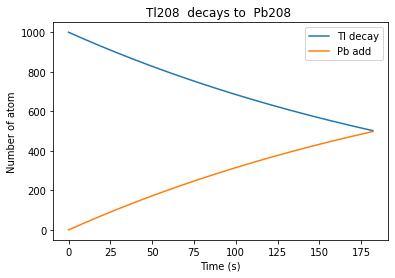

In [58]:
import numpy as np
import matplotlib.pyplot as plt

tau = 3.052*60 #seconds
N_Tl = 1000
N_pb = 0

def f1(t, tau=3.052*60):
    return 1 - 2**((-t)/tau)

Tl_decay = []

for i in range(int(tau)):
    Tl_decay.append(f1(i))
    
Tl_decay_1000 = N_Tl - np.array(Tl_decay)*N_Tl
Pb_add = np.array(Tl_decay)*1000    
time = np.arange(int(tau))  

plt.plot(time, Tl_decay_1000, label = "Tl decay")
plt.plot(time, Pb_add, label = "Pb add")
plt.title("Tl208  decays to  Pb208 ")
plt.xlabel("Time (s)")
plt.ylabel("Number of atom")
plt.legend(loc = "best")
plt.show()

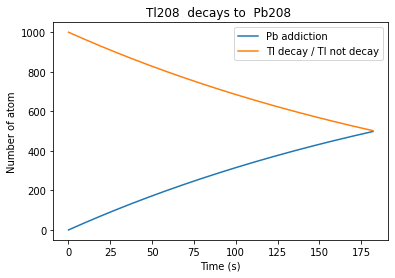

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def f2(t, tau=3.052*60):
    return (2**((-t)/tau))*(np.log(2)/tau)

time = np.linspace(0,int(tau),10000) 
indices = list(range(0,10000))

nonuniform_p = f2(time)
t_nonuniform = np.random.choice(time, size=1000,replace=False,
                                p=(nonuniform_p)/sum(nonuniform_p))
t_nonuniform = np.sort(t_nonuniform)

plt.plot(t_nonuniform, f1(t_nonuniform)*1000, label = "Pb addiction")
plt.plot(t_nonuniform, 1000-f1(t_nonuniform)*1000, label = "Tl decay / Tl not decay")
plt.title("Tl208  decays to  Pb208 ")
plt.xlabel("Time (s)")
plt.ylabel("Number of atom")
plt.legend(loc = "best")
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [34]:
import numpy as np

Z = 79
a_0 = 5.2917721067e-11 
sigma = a_0 / 100
e = 1.6e-19
E = 7.7e-16 * e
epsilon_0 = 8.854e-12
N = 1000000
b = np.random.normal(scale=sigma,size=N)

theta = 2*np.arctan((Z*e**2)/(4*np.pi*epsilon_0*E*b)) # deflection angle
#print(theta)
bounce_back = len(theta[theta>abs(np.pi/2)])
#print(bounce_back)
fraction_bounce_back = bounce_back/N
print("Fraction of bounce back:", fraction_bounce_back)

Fraction of bounce back: 0.49932


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

0.72819


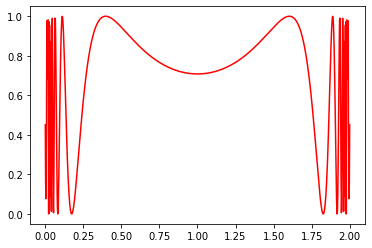

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')

N=100000
count=0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    if y < f(x): count+=1
I=count/N
print(I)

In [2]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

N = 100000
x = np.random.uniform(size = N)
a = 0
b = 1
I = ((b-a)/N)*sum(f(x))
print(I)

0.7251937608984772


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
import numpy as np

N = 100000
r = 1
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
d = x**2+y**2
points_inside = len(d[np.sqrt(d)<=r])
print("Number of point in side sphere: ", points_inside, "points")
A = 4*(points_inside/N)
print("Area of the circle: ", A)

Number of point in side sphere:  78660 points
Area of the circle:  3.1464


In [9]:
def SphereVolume(dim, N):
    point = np.random.uniform(-1.0, 1.0, size=[N,dim])
    distance = np.apply_along_axis(np.linalg.norm, 1, point)
    count_in_sphere = len(distance[distance<=1])
    return np.power(2.0, dim) * (count_in_sphere / N)

print("Volume of a 10D sphere: ",SphereVolume(10, 100000))
print("Area of a circle: ", SphereVolume(2,100000))

Volume of a 10D sphere:  2.47808
Area of a circle:  3.13772


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [4]:
import numpy as np

def f(x):
    return (x**(-0.5))/(np.exp(x)+1) 

def w(x):
    return np.sqrt(x)**-1

def inv_trans(x):
    return np.square(x)/4

N = 100000
x = np.random.uniform(0,2,size=N)
y = inv_trans(x)
I = (np.sum(f(y)/w(y))*2)/N
print(I)
    

0.8382795915297694
